<a href="https://colab.research.google.com/github/GzpTez0514/-/blob/main/Pytorch%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A009_%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 从本地读取文件
from google.colab import files

uploaded = files.upload()
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))   

Saving edge detection.PNG to edge detection.PNG


In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('blue-peacock.jpg')
print(img)
print(img.shape) # (1707, 2560, 3)

[[[ 20  27  30]
  [ 22  29  32]
  [ 24  31  34]
  ...
  [109 153  84]
  [108 152  83]
  [104 148  79]]

 [[ 23  30  33]
  [ 26  33  36]
  [ 28  35  38]
  ...
  [108 152  83]
  [108 152  83]
  [105 149  80]]

 [[ 20  27  30]
  [ 24  31  34]
  [ 26  33  36]
  ...
  [107 151  82]
  [107 151  82]
  [104 148  79]]

 ...

 [[ 89 104 106]
  [ 98 111 113]
  [ 76  85  88]
  ...
  [111 133 169]
  [113 132 169]
  [111 133 169]]

 [[ 92 107 109]
  [100 113 115]
  [ 78  87  91]
  ...
  [115 137 173]
  [116 138 174]
  [116 138 174]]

 [[ 94 112 113]
  [102 117 119]
  [ 80  91  95]
  ...
  [118 139 177]
  [118 141 179]
  [119 142 180]]]
(1707, 2560, 3)


uint8


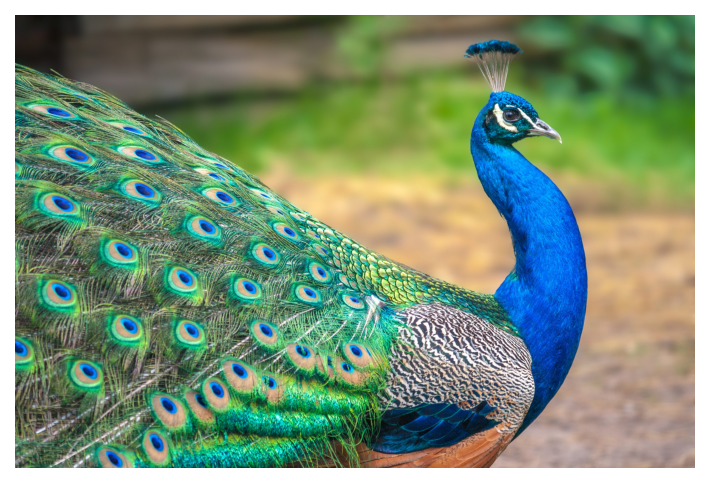

In [38]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(dpi=150) # 画布，dpi是分辨率
plt.imshow(img)
plt.axis('off') # 不显示坐标轴
print(img.dtype)

[  0   1 255]
[10 11  9]
[246 247 245]
float64
[0.  0.  0.5 1.  1. ]


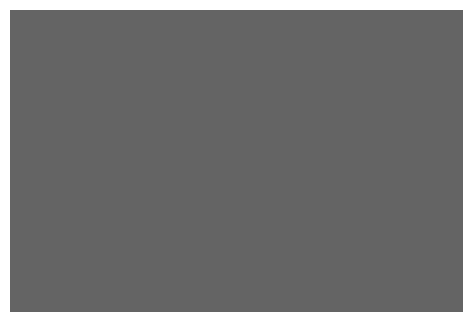

In [43]:
a = np.array([0, 1, 255], dtype='uint8')
print(a)
print(a + 10)
print(a - 10)

img = img / 255
print(img.dtype)

# 调亮画面
img_ = np.clip(img + 100/255, 0, 1) # np.clip是一个抹掉范围外值的函数
plt.figure(dpi=100)
plt.imshow(img_)
plt.axis('off')

a = [-2, 0, 0.5, 1, 1.5]
print(np.clip(a, 0, 1))


(-0.5, 2559.5, 1706.5, -0.5)

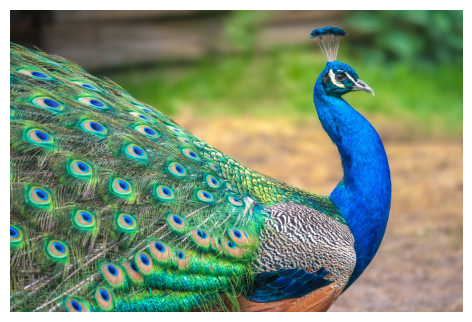

In [44]:
img = cv2.imread('blue-peacock.jpg')
# opencv默认读取后的图像通道是BGR，为了调整饱和度，我们直接将通道转换为HSV
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)
# 这里分解出来的是uint8，需要在uint8上进行数值操作则必须先更换为浮点数
final_hsv = cv2.merge((h, s, v))

# 为了绘图，这里是转回RGB
img_s = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
plt.figure(dpi=100)
plt.imshow(img_s)
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

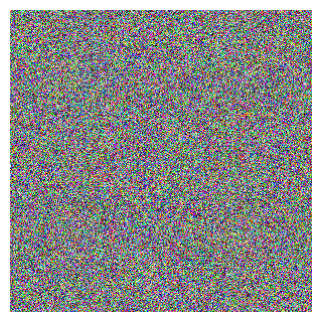

In [1]:
import numpy as np
import matplotlib.pyplot as plt
pic = np.random.randint(0, 255, size=(300, 300, 3))

plt.figure(dpi=100)
plt.imshow(pic)
plt.axis('off')

(Text(0.5, 1.0, 'sobely'), (-0.5, 552.5, 552.5, -0.5))

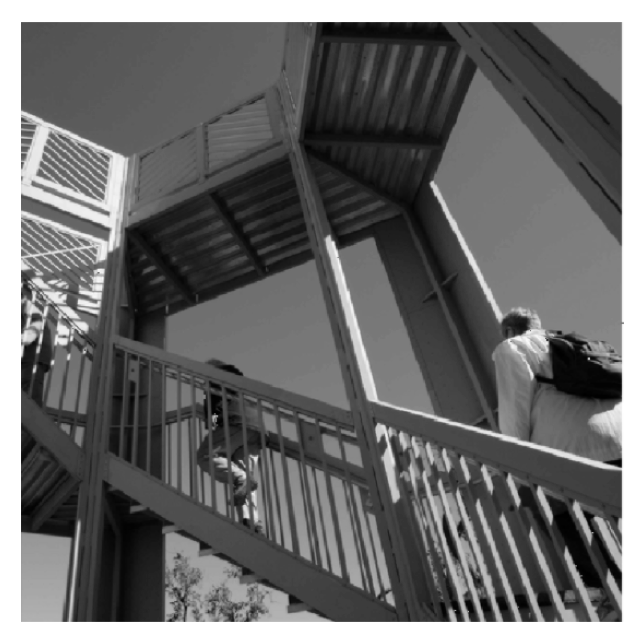

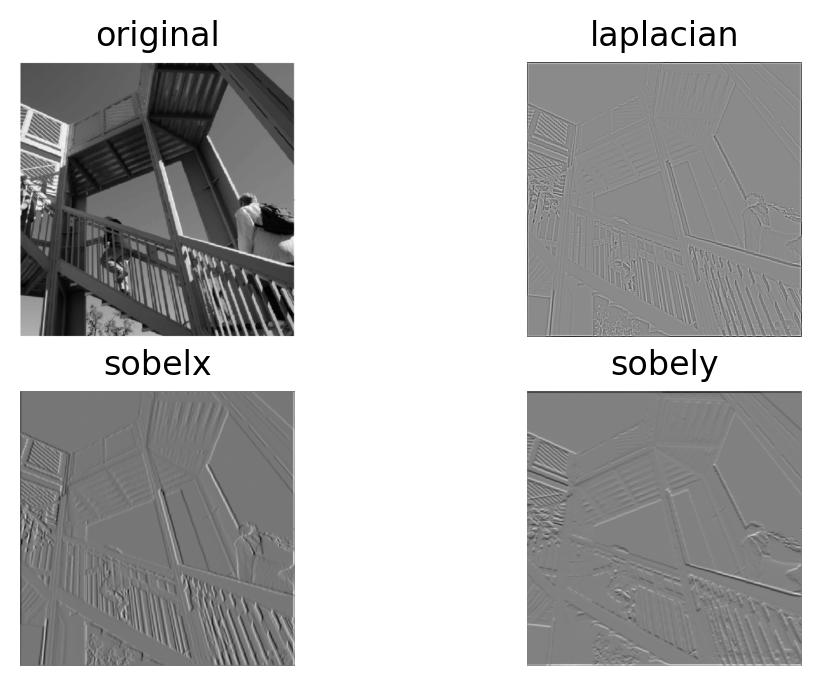

In [6]:
# 边缘检测
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('edge detection.PNG')

# 索贝尔等经典卷积操作在灰度图像上表现更好，因此我们将图像导入时就转化为灰度图像
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 查看原图
plt.figure(dpi=200)
plt.imshow(img, cmap='gray')
plt.axis('off')

# 两种经典算子：拉普拉斯与索贝尔
# cv2.CV64F是opencv中常使用的一种数据格式，在这里输入之后可以保证输出数据就是uint8类型
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=5)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5) # 横向的索贝尔，旋转矩阵为5x5
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5) # 纵向的索贝尔

plt.figure(dpi=200)
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('original'), plt.axis('off')
plt.subplot(222), plt.imshow(laplacian, cmap='gray')
plt.title('laplacian'), plt.axis('off')
plt.subplot(223), plt.imshow(sobelx, cmap='gray')
plt.title('sobelx'), plt.axis('off')
plt.subplot(224), plt.imshow(sobely, cmap='gray')
plt.title('sobely'), plt.axis('off')
